# Time-Varying Causality with AR-1 Continuous Time-Series

## AR-1 Gaussian Signal Model
We have two time series $\{ X_n \}_{n=1}^N$ and $\{ X_n \}_{n=1}^N$. For starters, we'll assume they obey AR-1 linear Gaussian models, i.e.:

$$
X_n = \theta_0 + \theta_1 X_{n-1} + \theta_2 Y_{n-1} + U_n
$$
$$
Y_n = \gamma_0 + \gamma_1 Y_{n-1} + \gamma_2 X_{n-1} + V_n
$$

where $U_n \sim \mathcal{N}(\mu_U,\sigma_U^2)$ and $V_n \sim \mathcal{N}(\mu_V,\sigma_V^2)$ iid for $n=1,\dots,N$. Note that by reparameterizing $\theta_0$ and $\gamma_0$, we can assume $\mu_U = \mu_V = 0$.

## Sequential Prediction
Focusing only on one direction to start, our goal will be to predict the probability of the next sample, $X_{n}$ given the past. We will simultaneously do this with the complete past (allow ourselves to use $X^{n-1}$ and $Y^{n-1}$ in the prediction) and with the restricted past (allow ourselves to only use $X^{n-1}$ in the prediction). We will define the complete and restricted distributions on $X_{n}$ as:

$$
\hat{f}_{X_n}^{(c)}(x_n) \triangleq f_{X_n \mid X^{n-1},Y^{n-1}}(x_n \mid x^{n-1},y^{n-1})
$$
$$
\hat{f}_{X_n}^{(r)}(x_n) \triangleq f_{X_n \mid X^{n-1}}(x_n \mid x^{n-1})
$$

Where $\hat{f}_{X_n}^{(c)}$ and $\hat{f}_{X_n}^{(r)}$ are fully defined by $\hat{\theta}^{(c)} = (\hat{\theta}_0,\hat{\theta}_1,\hat{\theta}_2)$ and $\hat{\theta}^{(r)} = (\hat{\theta}_0,\hat{\theta}_1)$, respectively.

For now, we will estimate these distributions using Bayesian updating scheme, where with new observation we update our posterior over the parameters. The posteriors are defined as:

$$
f_n^{(c)}(\theta) \triangleq f_{\Theta\mid X^{n-1},Y^{n-1}}(\theta \mid x^{n-1},y^{n-1})
$$

$$
f_n^{(r)}(\theta) \triangleq f_{\Theta\mid X^{n-1}}(\theta \mid x^{n-1})
$$

For example, to get out estimate of the density for the next sample at time $n$, we update our posterior over the parameters based on our most recent sample at time $n-1$:

$$
f^{(c)}_{n-1}(\theta) 
= \frac{f_{X_{n-1}\mid X^{n-2},Y^{n-2}}(x_{n-1}\mid x^{n-2},y^{n-2};\theta)\cdot f^{(c)}_{n-2}(\theta)}{\int f_{X_{n-1}\mid X^{n-2},Y^{n-2}}(x_{n-1}\mid x^{n-2},y^{n-2};\theta')\cdot f^{(c)}_{n-2}(\theta') d\theta'} 
= \frac{f_{X_{n-1}\mid X_{n-2},Y_{n-2}}(x_{n-1}\mid x_{n-2},y_{n-2};\theta)\cdot f^{(c)}_{n-2}(\theta)}{\int f_{X_{n-1}\mid X_{n-2},Y_{n-2}}(x_{n-1}\mid x_{n-2},y_{n-2};\theta')\cdot f^{(c)}_{n-2}(\theta') d\theta'}
$$

$$
f^{(r)}_{n-1}(\theta) 
= \frac{f_{X_{n-1}\mid X^{n-2}}(x_{n-1}\mid x^{n-2};\theta)\cdot f^{(r)}_{n-2}(\theta)}{\int f_{X_{n-1}\mid X^{n-2}}(x_{n-1}\mid x^{n-2};\theta')\cdot f^{(r)}_{n-2}(\theta') d\theta'}
= \frac{f_{X_{n-1}\mid X_{n-2}}(x_{n-1}\mid x_{n-2};\theta)\cdot f^{(r)}_{n-2}(\theta)}{\int f_{X_{n-1}\mid X_{n-2}}(x_{n-1}\mid x_{n-2};\theta')\cdot f^{(r)}_{n-2}(\theta') d\theta'}
$$

where $f^{(*)}_1(\theta) \triangleq \mathcal{N}(\mu^{(*)}_1,\Sigma^{(*)}_1)$ is our ***prior***. For now we will assume $\mu^{(*)}_1=\mathbf{0}$ and $\Sigma^{(*)}_1=\sigma^2_\theta \mathbf{I}$, i.e. for both the complete and restricted models, we define our *prior* over the parameters to be a zero-mean multivariate Gaussian. $\mathbf{0}$ and $\mathbf{I}$ are the appropriately zero-vector and identity matrix, respectively. We note that the selection of a Gaussian prior is due to the fact that it is a ***conjugate prior*** and therefore facilitates closed form updates for the posterior. Ideally, we would use a ***non-informative prior***. For now though, we can mitigate the concern of our prior being inaccurate by making $\sigma^2_\theta$ very large.

In order to find the closed form updates for the posterior, we'll define $d^{(c)}_{n} \triangleq [1,x_{n-1},y_{n-1}]^T$ and $d^{(r)}_{n} \triangleq [1,x_{n-1}]^T$ such that the mean of the Gaussian likelihoods will be $\theta^T d^{(*)}_{n}$. Thus, we have:

\begin{align}
f^{(*)}(\theta \mid {d^{(*)}}^{n-1}) &= \mathcal{N}(\mu^{(*)}_n,\Sigma^{(*)}_n) \\
& \propto f_{X_{n-1}\mid D^{(*)}_{n-1}}(x_{n-1}\mid d^{(*)}_{n-1};\theta)\cdot f^{(*)}_{n-1}(\theta) \\
& = \mathcal{N}(x_{n-1}; \theta^T d^{(*)}_{n-1},\sigma_U^2)\cdot \mathcal{N}(\theta; \mu^{(*)}_{n-1},\Sigma^{(*)}_{n-1}) \\
& \propto \exp\left[ -\frac{1}{2}\left( \frac{1}{\sigma_U^2}(x_{n-1} - \theta^T d^{(*)}_{n-1})^2 + (\theta - \mu^{(*)}_{n-1})^T {\Sigma^{(*)}_{n-1}}^{-1}(\theta - \mu^{(*)}_{n-1})  \right)\right] \\
& \propto \exp\left[ -\frac{1}{2}\left( \theta^T \left( \frac{d^{(*)}_{n-1} {d^{(*)}_{n-1}}^T}{\sigma_U^2} + {\Sigma^{(*)}_{n-1}}^{-1} \right)\theta - 2 \theta^T \left( \frac{x_{n-1}}{\sigma_U^2}d^{(*)}_{n-1} + {\Sigma^{(*)}_{n-1}}^{-1}\mu^{(*)}_{n-1} \right) \right) \right] \\
& \propto \exp\left[ -\frac{1}{2} \left( \theta -  \left( \frac{d^{(*)}_{n-1} {d^{(*)}_{n-1}}^T}{\sigma_U^2} + {\Sigma^{(*)}_{n-1}}^{-1} \right)^{-1} \left( \frac{x_{n-1}}{\sigma_U^2}d^{(*)}_{n-1} + {\Sigma^{(*)}_{n-1}}^{-1}\mu^{(*)}_{n-1} \right) \right)^T \left( \frac{d^{(*)}_{n-1} {d^{(*)}_{n-1}}^T}{\sigma_U^2} + {\Sigma^{(*)}_{n-1}}^{-1} \right) \left( \theta -  \left( \frac{d^{(*)}_{n-1} {d^{(*)}_{n-1}}^T}{\sigma_U^2} + {\Sigma^{(*)}_{n-1}}^{-1} \right)^{-1} \left( \frac{x_{n-1}}{\sigma_U^2}d^{(*)}_{n-1} + {\Sigma^{(*)}_{n-1}}^{-1}\mu^{(*)}_{n-1} \right) \right) \right] \\
\end{align}

Thus, our closed form update for the posterior is given by:

\begin{align}
\mu^{(*)}_n &= \left( \frac{d^{(*)}_{n-1} {d^{(*)}_{n-1}}^T}{\sigma_U^2} + {\Sigma^{(*)}_{n-1}}^{-1} \right)^{-1} \left( \frac{x_{n-1}}{\sigma_U^2}d^{(*)}_{n-1} + {\Sigma^{(*)}_{n-1}}^{-1} \mu^{(*)}_{n-1} \right) \\
\Sigma^{(*)}_n &= \left( \frac{d^{(*)}_{n-1} {d^{(*)}_{n-1}}^T}{\sigma_U^2} + {\Sigma^{(*)}_{n-1}}^{-1} \right)^{-1}
\end{align}

Finally, we note that this means that our predictive distribtuions $f^{(*)}_{X_n}(x_n)$ are Gaussian by observing that $x_n$ is a linear transformation of a Gaussian random vector. Specifically, define:

$$
{d'_n}^{(c)} \triangleq [1,x_{n-1},y_{n-1},1]^T
$$

$$
{d'_n}^{(r)} \triangleq [1,x_{n-1},1]^T
$$

$$
e^{(*)}_n \triangleq [ \theta^{(*)} , U_n ]^T
$$

At each step we know ${d'_n}^{(*)}$ and our predictions of $x_n$ are ${e^{(*)}_n}^T{d'_n}^{(*)}$. Thus, since:

$$
e^{(*)}_n \sim 
\mathcal{N}\left({\mu'_n}^{(*)},{\Sigma'_n}^{(*)}\right) \triangleq
\mathcal{N}
\left( 
\begin{bmatrix} 
\mu_{n}^{(*)} \\ 0
\end{bmatrix},
\begin{bmatrix} 
\Sigma_{n}^{(*)} & \mathbf{0} \\ 
\mathbf{0}^T     & \sigma_U^2
\end{bmatrix}     
\right)
$$

we get:

$$
\hat{f}_{X_n}^{(*)}(x_n) 
= \mathcal{N}({d'^{(*)}_n}^T {\mu'_n}^{(*)},{d'^{(*)}_n}^T {\Sigma'_n}^{(*)} {d'^{(*)}_n})
\triangleq \mathcal{N}( \mu_{X_n}^{(*)}, \sigma_{X_n}^{2(*)} )
$$

## Causal Inference
Once we have the predictive distributions, we can measure causality by looking at the KL divergence from the restricted to the complete predictive distribution, which we will define as the *estimated causal effect* of $Y$ on $X$ at time $n$: 

$$
\hat{C}_{Y\rightarrow X}(n) \triangleq 
D\left(\hat{f}_{X_n}^{(c)} \mid \mid \hat{f}_{X_n}^{(r)} \right) = 
\log \frac{\sigma_{X_n}^{(r)}}{\sigma_{X_n}^{(c)}} + \frac{\sigma_{X_n}^{2(c)}+\left( \mu_{X_n}^{(c)} - \mu_{X_n}^{(r)}\right)^2}{2\sigma_{X_n}^{2(r)}} - \frac{1}{2}
$$

One way to think of this, roughly, is as **the number of excess bits we use if we built a code based on the restricted model as opposed to the true, complete model**.

### The "True" Causal Effect
Consider the *true causal effect* $C_{Y \rightarrow X}$. We can analyze this by forcing the posteriors over the parameters to be point masses at the true parameters. For the complete distribution, we will force $\Sigma_n^{(c)} = \mathbf{0}$ and $\mu_n{(c)} = [\theta_0, \theta_1,\theta_2]^T$. As a result, we get that $\mu_{X_n}^{(c)} = \theta_0 + \theta_1 x_{n-1} + \theta_2 y_{n-1}$ and $\sigma_{X_n}^{2(c)} = \sigma_U^2$. Unfortunately, the restricted case is less straightforward. What are the "true" $\theta_0$ and $\theta_1$ when creating the restricted model. Would we would want our restricted sequential predictor to come up with the same parameters as the complete predictor does? ***I'm still not sure about this***. Let's imagine the $\theta_0=0$, i.e. there is no constant offset to $X$, and we remove the noise from $Y$ and make $Y_n = 1.1\cdot Y_{n-1}$. Then if $X_n = 1.1\cdot X_{n-1} + 1.1\cdot Y_{n-1}$ we can imagine that the model that the best restricted model is *not* $X_n = 1.1\cdot X_{n-1}$.

So what is the best model? If we could hard-code $\mu_{X_n}^{(r)}$ and $\sigma_{X_n}^{2(r)}$, what should it be? Without answering this we can't propoerly define the true causal effect. So let's just for starters consider the case when we *do* want to get the same $\theta_0$ and $\theta_1$ for the complete and restricted models. In this case we force $\Sigma_n^{(r)} = \mathbf{0}$ and $\mu_n{(r)} = [\theta_0, \theta_1]^T$ and get $\mu_{X_n}^{(r)} = \theta_0 + \theta_1 x_{n-1}$ and $\sigma_{X_n}^{2(r)} = \sigma_U^2$. Then, plugging these values of $\mu_{X_n}^{(c)}$, $\sigma_{X_n}^{2(c)}$, $\mu_{X_n}^{(r)}$, and $\sigma_{X_n}^{2(r)}$ into our equation for causality yields:

\begin{align}
D\left( \mathcal{N}( \theta_0 + \theta_1 x_{n-1} + \theta_2 y_{n-1},\sigma_U^2) \mid \mid \mathcal{N}( \theta_0 + \theta_1 x_{n-1},\sigma_U^2) \right)
&= \log \frac{\sigma_U}{\sigma_U} + \frac{\sigma_U^2 + \left[ \left( \theta_0 + \theta_1 x_{n-1} + \theta_2 y_{n-1} \right) - \left( \theta_0 + \theta_1 x_{n-1} \right) \right]^2}{2\sigma_U^2} - \frac{1}{2} \\
&= \frac{(\theta_2 y_{n-1})^2}{2\sigma_U^2}
\end{align}

This makes a lot of sense. Basically, we see that the more the past of $Y$ offsets the mean of the true predictive distribution, the greater the "causal effect" of $Y$ on $X$ is. Furthermore, this is normalized by the inherent uncertainty in $X$, as measured by $\sigma_U^2$. If we have extreme uncertainty in the future of $X$ simply because the variance of the noise is large, then an offset of the mean by $Y$ is not going to have a huge impact.


Alternatively, we can consider the true restricted model as the true conditional distribution of the conditional random variable $X_n \mid X^{n-1}=x^{n-1}$. Setting the initial conditions $E[X_0] = E[Y_0] = \operatorname{Var}[X_0] = \operatorname{Var}[Y_0]=0$, we get the following updates:

\begin{align}
\mu_{X_n}^{(r)} = E[X_n \mid X^{n-1}=x^{n-1}] &= \theta_0 + \theta_1 x_{n-1} + \theta_2 E[Y_{n-1} \mid X^{n-2}=x^{n-2}]\\
\sigma_{X_n}^{2(r)} = \operatorname{Var}[X_n \mid X^{n-1}=x^{n-1}] &= \sigma_U^2 + \theta_2^2 \operatorname{Var}[Y_{n-1} \mid X^{n-2}=x^{n-2}] \\
E[Y_n \mid X^{n-1}=x^{n-1}] &= \gamma_0 + \gamma_1 E[Y_{n-1} \mid X^{n-2}=x^{n-2}] + \gamma_2 x_{n-1}\\
\operatorname{Var}[Y_n \mid X^{n-1}=x^{n-1}] &= \sigma_V^2 + \gamma_1^2 \operatorname{Var}[Y_{n-1} \mid X^{n-2}=x^{n-2}] \\
\end{align}

An intersting note is that $\sigma_{X_n}^{2(r)}$ does not depend on the actual samples, i.e. $\forall x^{n-1},\tilde{x}^{n-1} \in \mathbb{R}^{n-1}, \operatorname{Var}[X_n \mid X^{n-1}=x^{n-1}] = \operatorname{Var}[X_n \mid X^{n-1}=\tilde{x}^{n-1}]$ (*but it is important to note that this does not mean $\operatorname{Var}[X_n] = \operatorname{Var}[X_n \mid X^{n-1}=x^{n-1}]$!*). In particular, we get that:

$$
\operatorname{Var}[Y_n \mid X^{n-1}=x^{n-1}] = \sigma_V^2 \sum_{i=0}^{n-1} \gamma_1^{2i}
$$

and thus:

$$
\sigma_{X_n}^{2(r)} = \sigma_U^2 + \theta_2^2 \sigma_V^2 \sum_{i=0}^{n-1} \gamma_1^{2i} = \sigma_U^2 + \theta_2^2 \sigma_V^2 \frac{\gamma_1^{2n} - 1}{\gamma_1^2 - 1}
$$

Plugging this into the causality equation yields:

\begin{align}
D\left( \mathcal{N}( \mu_{X_n}^{(c)} ,\sigma_{X_n}^{2(c)}) \mid \mid \mathcal{N}( \mu_{X_n}^{(r)} ,\sigma_{X_n}^{2(r)}) \right)
&= \log \frac{\sigma_{X_n}^{(r)}}{\sigma_{X_n}^{(c)}} + \frac{\sigma_{X_n}^{2(c)}+\left( \mu_{X_n}^{(c)} - \mu_{X_n}^{(r)}\right)^2}{2\sigma_{X_n}^{2(r)}} - \frac{1}{2} \\
&= \log \frac{\sqrt{\sigma_U^2 + \theta_2^2 \sigma_V^2 \frac{\gamma_1^{2n} - 1}{\gamma_1^2 - 1}}}{\sigma_U} + \frac{\sigma_U^2+\left( \theta_2 E[Y_{n-1} \mid X^{n-2}=x^{n-2}] \right)^2}{2 \left( \sigma_U^2 + \theta_2^2 \sigma_V^2 \frac{\gamma_1^{2n} - 1}{\gamma_1^2 - 1} \right)} - \frac{1}{2}
\end{align}

An interesting observation is that if $\lvert \gamma_1 \rvert \ge 1$, then the true causal measure is unstable (i.e. approaches infinity) unless $\theta_2 = 0$. This makes sense! One way to think about it is that for $\lvert \gamma_1 \rvert \ge 1$, the variance of $Y_n$ (even if we are allowed to see $X^{n-1}$) is unbounded. Thus, unless $Y$ has *absolutely zero* causal influence on $X$, the amount that we *gain* by knowing $Y$ is constantly increasing. On the other hand, if $\lvert \gamma_1 \rvert < 1$, so long as the expected value of $Y$ doesn't blow up, then we should see the causal effect converge.

As a matter of fact, so long as $X_n$ is bounded, i.e. $\lvert X_n \rvert \le M \in \mathbb{R}$ for all $n=1,2,\dots$,  we can show that $E[Y_n \mid X^{n-1} = x^{n-1} ]$ is bounded as well. We note that:

\begin{align}
E[Y_n \mid X^{n-1} = x^{n-1}]
&= E[\gamma_0 + \gamma_1 Y_{n-1} + \gamma_2 X_{n-1} + V_n \mid X^{n-1} = x^{n-1}] \\
&= \gamma_0 + \gamma_1 E[Y_{n-1} \mid X^{n-2} = x^{n-2}] + \gamma_2 x_{n-1} \\
&= \sum_{i=0}^{n-1} \left( \gamma_0  \gamma_1^i + \gamma_2 x_{n-1-i}\gamma_1^i \right)\\
&\le \left( \gamma_0 + \gamma_2 \max\{x^{n-1}\} \right) \sum_{i=0}^{n-1}  \gamma_1^i \\
&\le \left( \gamma_0 + \gamma_2 M \right) \left( \frac{1 - \gamma_1^n}{1 - \gamma_1} \right)
\end{align}

## Simulations

In [1]:
import numpy as np
from numpy.random import randn
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'image.cmap': 'jet'},style="whitegrid")

### Generating a Sequence
First we'll create a function for generating two AR-1 Guassian time series.

In [422]:
#### Inputs
# thetas: array of 3-tuples where each one is a parameter set for determining x in a given 'regime'
# gammas: array of 3-tuples where each one is a parameter set for determining y in a given 'regime'
# Ns: array of regime lengths (length of array must match number of tuples)
# sig_u: variance in x model
# sig_v: variance in y model
# X0: initial value for x
# Y0: inital value for y
# plot: whether or not to plot the series (and return axis handle)

def gen_sequence(thetas=[(1,1,1)],gammas=[(0,0,1)],Ns=[10],sig_u=1,sig_v=1,X0=0,Y0=0,plot=True):
    num_regimes = len(Ns)
    # Ensure the correct number of parameter sets were specified
    if len(thetas) != num_regimes or len(gammas) != num_regimes:
        raise ValueError("Must have same number of parameter sets for theta and gamma, " +
                         "and must match number of sample counts")   
    # Initialize both time series
    X = [X0]
    Y = [Y0]
    # Generate the data
    for regime in range(num_regimes):
        # For each regime, create parameter arrays
        theta = np.asarray(thetas[regime])
        gamma = np.asarray(gammas[regime])
        N = Ns[regime]
        for n in range(N):
            # At each time generate a new sample based on most recent samples
            prevx = np.asarray([1,X[-1],Y[-1]])
            prevy = np.asarray([1,Y[-1],X[-1]])
            X.append(np.dot(theta,prevx) + np.sqrt(sig_u)*randn())
            Y.append(np.dot(gamma,prevy) + np.sqrt(sig_v)*randn())
    if not plot:
        return X, Y
    else:
        fig,ax = plt.subplots(figsize = (15,5))
        ax.plot(X,'g',label='$X_n$')
        ax.plot(Y,'b',label='$Y_n$')
        if N > 20:
            ax.xaxis.set(ticks=np.arange(0,sum(Ns),sum(Ns)//20))
        ax.grid('on')
        ax.set_xlabel('$n$')
        ax.legend(loc='upper left')
        return X, Y, ax

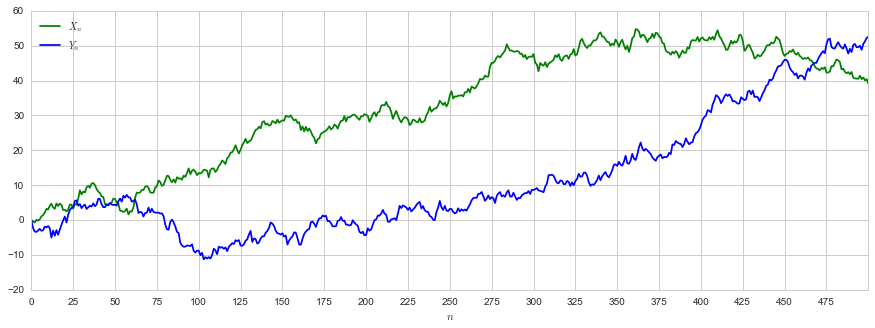

In [424]:
# Test function
gen_sequence(Ns=[300,200],
             thetas=[(0.05,1,0.01),(0.05,1,0)],
             gammas=[(0.02,1,0),(0.02,1,0.005)],
             sig_u=1,
             sig_v=1);

### Estimating Causal Influence
Next, we'll create a function to take in two time series and estimate the causal influence over time.

In [293]:
def infer_causality(X,Y,sig_u,sig_v,sig_init=5000,plot=True):
    N = np.size(X)
    # Track causal influences
    x2y = []
    y2x = []
    # Track parameters for posterior and predictive densities
    posterior_params = {}
    posterior_params['mtcs'] = []
    posterior_params['mtrs'] = []
    posterior_params['mgcs'] = []
    posterior_params['mgrs'] = []
    posterior_params['stcs'] = []
    posterior_params['strs'] = []
    posterior_params['sgcs'] = []
    posterior_params['sgrs'] = []
    predictive_params = {}
    predictive_params['mtcs'] = []
    predictive_params['mtrs'] = []
    predictive_params['mgcs'] = []
    predictive_params['mgrs'] = []
    predictive_params['stcs'] = []
    predictive_params['strs'] = []
    predictive_params['sgcs'] = []
    predictive_params['sgrs'] = []
    # Initialize posterior means to be zero
    post_mu_theta_c = np.asarray([0,0,0]).reshape(3,1)
    post_mu_theta_r = np.asarray([0,0]).reshape(2,1)
    post_mu_gamma_c = np.asarray([0,0,0]).reshape(3,1)
    post_mu_gamma_r = np.asarray([0,0]).reshape(2,1)
    # Initialize posterior variance to be constant*identity
    post_sig_theta_c = sig_init*np.eye(3)
    post_sig_theta_r = sig_init*np.eye(2)
    post_sig_gamma_c = sig_init*np.eye(3)
    post_sig_gamma_r = sig_init*np.eye(2)
    # Initialize vector of past samples augmented with offset
    prev_x_c = np.asarray([1,X[0],Y[0]]).reshape(3,1)
    prev_x_r = np.asarray([1,X[0]]).reshape(2,1)
    prev_y_c = np.asarray([1,Y[0],X[0]]).reshape(3,1)
    prev_y_r = np.asarray([1,Y[0]]).reshape(2,1)
    for n in range(1,N):
        # Update mean and covariance of four POSTERIOR distributions
        post_mu_theta_c = inv(np.dot(prev_x_c,prev_x_c.T)/sig_u + inv(post_sig_theta_c)).dot(
                            X[n]/sig_u + np.dot(inv(post_sig_theta_c),post_mu_theta_c))
        post_mu_theta_r = inv(np.dot(prev_x_r,prev_x_r.T)/sig_u + inv(post_sig_theta_r)).dot(
                            X[n]/sig_u + np.dot(inv(post_sig_theta_r),post_mu_theta_r))
        post_mu_gamma_c = inv(np.dot(prev_y_c,prev_y_c.T)/sig_v + inv(post_sig_gamma_c)).dot(
                            Y[n]/sig_v + np.dot(inv(post_sig_gamma_c),post_mu_gamma_c))
        post_mu_gamma_r = inv(np.dot(prev_y_r,prev_y_r.T)/sig_v + inv(post_sig_gamma_r)).dot(
                            Y[n]/sig_v + np.dot(inv(post_sig_gamma_r),post_mu_gamma_r))
        post_sig_theta_c = inv(np.dot(prev_x_c,prev_x_c.T)/sig_u + inv(post_sig_theta_c))
        post_sig_theta_r = inv(np.dot(prev_x_r,prev_x_r.T)/sig_u + inv(post_sig_theta_r))
        post_sig_gamma_c = inv(np.dot(prev_y_c,prev_y_c.T)/sig_v + inv(post_sig_gamma_c))
        post_sig_gamma_r = inv(np.dot(prev_y_r,prev_y_r.T)/sig_v + inv(post_sig_gamma_r))
        posterior_params['mtcs'].append(post_mu_theta_c)
        posterior_params['mtrs'].append(post_mu_theta_r)
        posterior_params['mgcs'].append(post_mu_gamma_c)
        posterior_params['mgrs'].append(post_mu_gamma_r)
        posterior_params['stcs'].append(post_sig_theta_c)
        posterior_params['strs'].append(post_sig_theta_r)
        posterior_params['sgcs'].append(post_sig_gamma_c)
        posterior_params['sgrs'].append(post_sig_gamma_r)
        # Update past sample vector for computing predictive distribution
        prev_x_c = np.asarray([1,X[n],Y[n]]).reshape(3,1)
        prev_x_r = np.asarray([1,X[n]]).reshape(2,1)
        prev_y_c = np.asarray([1,Y[n],X[n]]).reshape(3,1)
        prev_y_r = np.asarray([1,Y[n]]).reshape(2,1)
        # Update mean and covariance of four PREDICTIVE distributions
        pred_mu_theta_c = np.dot(prev_x_c.T,post_mu_theta_c)
        pred_mu_theta_r = np.dot(prev_x_r.T,post_mu_theta_r)
        pred_mu_gamma_c = np.dot(prev_y_c.T,post_mu_gamma_c)
        pred_mu_gamma_r = np.dot(prev_y_r.T,post_mu_gamma_r)
        pred_sig_theta_c = prev_x_c.T.dot(post_sig_theta_c).dot(prev_x_c) + sig_u
        pred_sig_theta_r = prev_x_r.T.dot(post_sig_theta_r).dot(prev_x_r) + sig_u
        pred_sig_gamma_c = prev_y_c.T.dot(post_sig_gamma_c).dot(prev_y_c) + sig_v
        pred_sig_gamma_r = prev_y_r.T.dot(post_sig_gamma_r).dot(prev_y_r) + sig_v
        predictive_params['mtcs'].append(pred_mu_theta_c)
        predictive_params['mtrs'].append(pred_mu_theta_r)
        predictive_params['mgcs'].append(pred_mu_gamma_c)
        predictive_params['mgrs'].append(pred_mu_gamma_r)
        predictive_params['stcs'].append(pred_sig_theta_c)
        predictive_params['strs'].append(pred_sig_theta_r)
        predictive_params['sgcs'].append(pred_sig_gamma_c)
        predictive_params['sgrs'].append(pred_sig_gamma_r)
        # Add the new causal estimates
        x2y_arr = np.log(np.sqrt(pred_sig_gamma_r)/np.sqrt(pred_sig_gamma_c)) + \
                  (pred_sig_gamma_c + (pred_mu_gamma_c-pred_mu_gamma_r)**2)/(2*pred_sig_gamma_r) - 0.5
        y2x_arr = np.log(np.sqrt(pred_sig_theta_r)/np.sqrt(pred_sig_theta_c)) + \
                  (pred_sig_theta_c + (pred_mu_theta_c-pred_mu_theta_r)**2)/(2*pred_sig_theta_r) - 0.5
        x2y.append(x2y_arr[0][0])
        y2x.append(y2x_arr[0][0])

    if not plot:
        return x2y, y2x, posterior_params, predictive_params
    else:
        fig,ax = plt.subplots(figsize = (15,5))
        ax.plot(x2y,'y',label='$C_{X -> Y}(n)$')
        ax.plot(y2x,'m',label='$C_{Y -> X}(n)$')
        if N > 20:
            ax.xaxis.set(ticks=np.arange(0,N,N//20))
        ax.grid('on')
        ax.set_xlabel('$n$')
        ax.legend()
        return x2y, y2x, posterior_params, predictive_params, ax

### Computing True Causal Influence
Next, define a function to compute the "true" causal influences between a pair of sequences.

In [413]:
def compute_causality(X,Y,thetas,gammas,Ns,sig_u,sig_v,plot=True):
    # The complete model params
    mu_x_c = 0
    sig_x_c = 0
    mu_y_c = 0
    sig_y_c = 0
    # The restricted model params
    mu_x_r = 0
    sig_x_r = 0
    mu_y_r = 0
    sig_y_r = 0
    # Auxiliary params for updating restricted model (such mean of current x given past of y)
    mu_x_y = 0    
    sig_x_y = 0
    mu_y_x = 0
    sig_y_x = 0
    # Causal measures
    x2y = []
    y2x = []
    # Track where we are in the sequences
    offset = 0
    for regime,N in enumerate(Ns):
        [theta0,theta1,theta2] = thetas[regime]
        [gamma0,gamma1,gamma2] = gammas[regime]
        for n in range(offset, offset + N):
            # Update the complete model params
            mu_x_c = theta0 + theta1*X[n] + theta2*Y[n]
            mu_y_c = gamma0 + gamma1*Y[n] + gamma2*X[n]
            sig_x_c = sig_u
            sig_y_c = sig_v
            # Update the restricted model params used in computing causality
            mu_x_r = theta0 + theta1*X[n] + theta2*mu_y_x
            mu_y_r = gamma0 + gamma1*Y[n] + gamma2*mu_x_y
            sig_x_r = sig_u + (theta2**2)*sig_y_x
            sig_y_r = sig_v + (gamma2**2)*sig_x_y
            # Update the auxiliary params
            mu_y_x = gamma0 + gamma1*mu_y_x + gamma2*X[n]
            mu_x_y = theta0 + theta1*mu_x_y + theta2*X[n]
            sig_y_x = sig_v**2 + (gamma1**2)*sig_y_x
            sig_x_y = sig_u**2 + (theta1**2)*sig_x_y
            # Update causal measures
            x2y.append(np.log(np.sqrt(sig_y_r)/np.sqrt(sig_y_c)) + \
                  (sig_y_c + (mu_y_c-mu_y_r)**2)/(2*sig_y_r) - 0.5)
            y2x.append(np.log(np.sqrt(sig_x_r)/np.sqrt(sig_x_c)) + \
                  (sig_x_c + (mu_x_c-mu_x_r)**2)/(2*sig_x_r) - 0.5)
        offset += N
    if not plot:
        return x2y, y2x
    else:
        fig,ax = plt.subplots(figsize = (15,5))
        ax.plot(x2y,'y',label='$C_{X -> Y}(n)$')
        ax.plot(y2x,'m',label='$C_{Y -> X}(n)$')
        if N > 20:
            ax.xaxis.set(ticks=np.arange(0,N,N//20))
        ax.grid('on')
        ax.set_xlabel('$n$')
        ax.legend()
        return x2y, y2x, ax

### Results
Lastly we generate a pair of sequences, estimate the causal influences, and compare with the true causal influences.

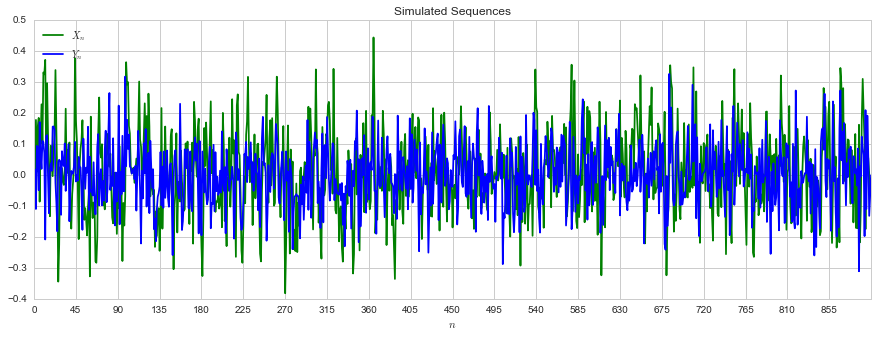

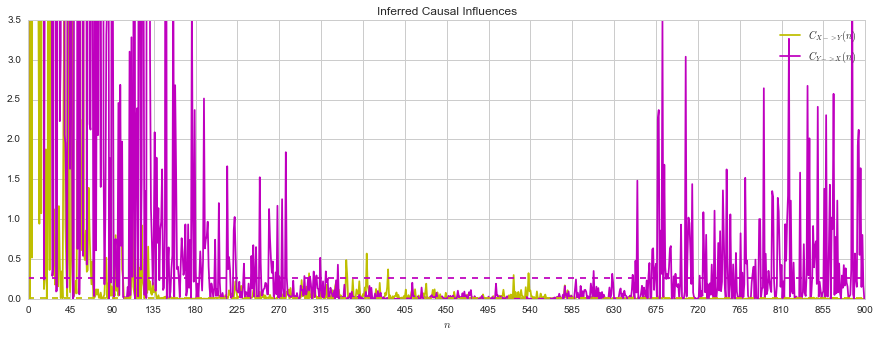

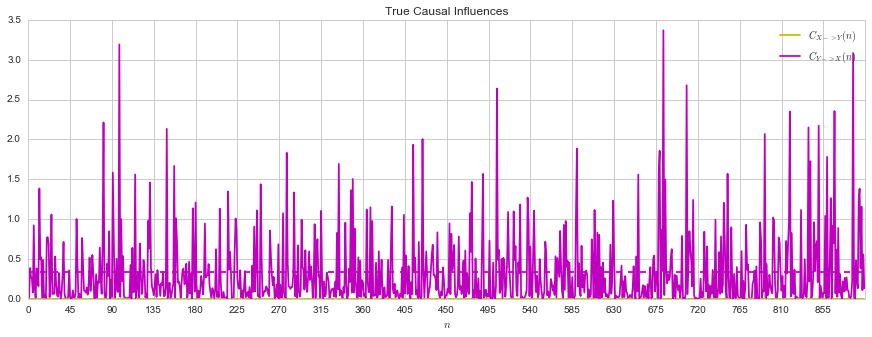

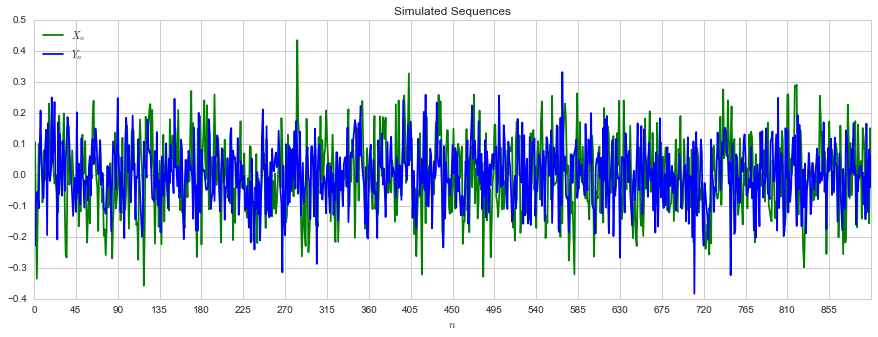

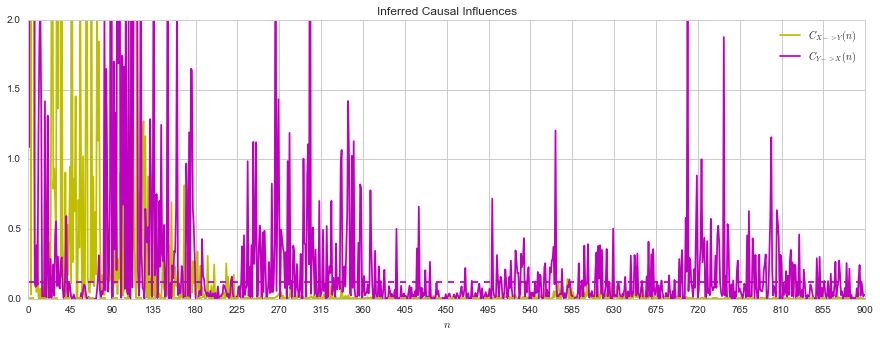

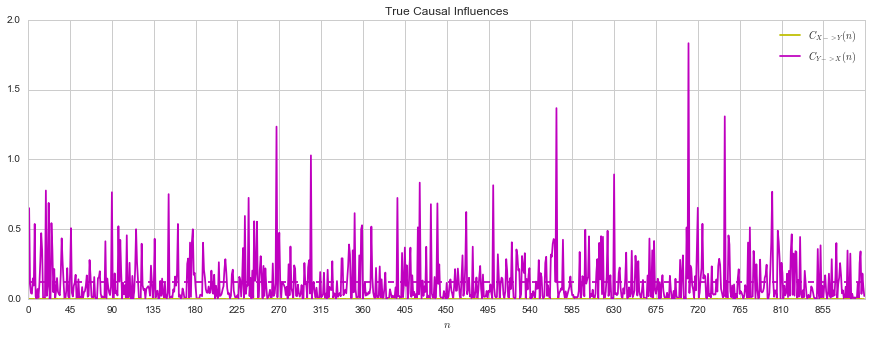

In [492]:
# Set parameters
sig_u = 0.01
sig_v = 0.01
Ns = [900]
thetas = [(0,0.3,0.8)]
gammas = [(0,0.1,0)]
# Generate sequences
X,Y,seq_ax = gen_sequence(Ns=Ns,thetas=thetas,gammas=gammas,sig_u=sig_u,sig_v=sig_v)
seq_ax.set_title("Simulated Sequences")
# Infer causal influences
x2y, y2x, posterior_params, predictive_params, infer_ax = infer_causality(X,Y,sig_u,sig_v,sig_init=1)
infer_ax.set_title("Inferred Causal Influences")
infer_ax.plot([0,sum(Ns)],[np.mean(x2y[sum(Ns)//2:]),np.mean(x2y[sum(Ns)//2:])],'y--')
infer_ax.plot([0,sum(Ns)],[np.mean(y2x[sum(Ns)//2:]),np.mean(y2x[sum(Ns)//2:])],'m--')
# Compute the "true" causality
x2y, y2x, true_ax = compute_causality(X,Y,thetas,gammas,Ns,sig_u,sig_v)
true_ax.set_title("True Causal Influences")
true_ax.plot([0,sum(Ns)],[np.mean(x2y[sum(Ns)//2:]),np.mean(x2y[sum(Ns)//2:])],'y--')
true_ax.plot([0,sum(Ns)],[np.mean(y2x[sum(Ns)//2:]),np.mean(y2x[sum(Ns)//2:])],'m--')
infer_ax.set_ylim(true_ax.get_ylim());

# Set parameters
sig_u = 0.01
sig_v = 0.01
Ns = [900]
thetas = [(0,0.3,0.5)]
gammas = [(0,0.1,0)]
# Generate sequences
X,Y,seq_ax = gen_sequence(Ns=Ns,thetas=thetas,gammas=gammas,sig_u=sig_u,sig_v=sig_v)
seq_ax.set_title("Simulated Sequences")
# Infer causal influences
x2y, y2x, posterior_params, predictive_params, infer_ax = infer_causality(X,Y,sig_u,sig_v,sig_init=1)
infer_ax.set_title("Inferred Causal Influences")
infer_ax.plot([0,sum(Ns)],[np.mean(x2y[sum(Ns)//2:]),np.mean(x2y[sum(Ns)//2:])],'y--')
infer_ax.plot([0,sum(Ns)],[np.mean(y2x[sum(Ns)//2:]),np.mean(y2x[sum(Ns)//2:])],'m--')
# Compute the "true" causality
x2y, y2x, true_ax = compute_causality(X,Y,thetas,gammas,Ns,sig_u,sig_v)
true_ax.set_title("True Causal Influences")
true_ax.plot([0,sum(Ns)],[np.mean(x2y[sum(Ns)//2:]),np.mean(x2y[sum(Ns)//2:])],'y--')
true_ax.plot([0,sum(Ns)],[np.mean(y2x[sum(Ns)//2:]),np.mean(y2x[sum(Ns)//2:])],'m--')
infer_ax.set_ylim(true_ax.get_ylim());

In [481]:
print("Theta Mean Complete")
print(posterior_params['mtcs'][-1])
print("Theta Mean Restricted")
print(posterior_params['mtrs'][-1])
print("Gamma Mean Complete")
print(posterior_params['mgcs'][-1])
print("Gamma Mean Restricted")
print(posterior_params['mgrs'][-1])

Theta Mean Complete
[[ 0.00309277]
 [ 0.37963659]
 [ 0.73731198]]
Theta Mean Restricted
[[ 0.00471811]
 [ 0.39485067]]
Gamma Mean Complete
[[ 0.00100432]
 [ 0.23942763]
 [ 0.12327955]]
Gamma Mean Restricted
[[ 0.00194023]
 [ 0.24424752]]
